<a href="https://colab.research.google.com/github/umakoduru2204/FMML-LAB-ASSIGNMENT/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

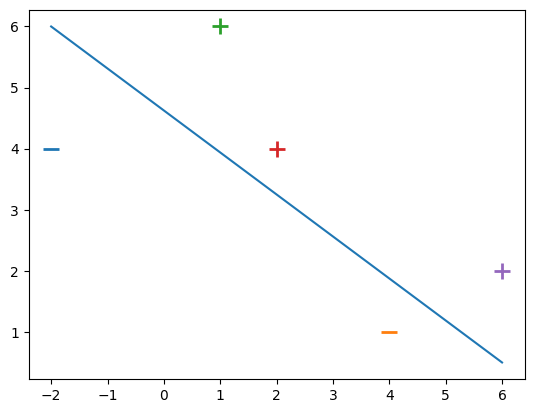

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

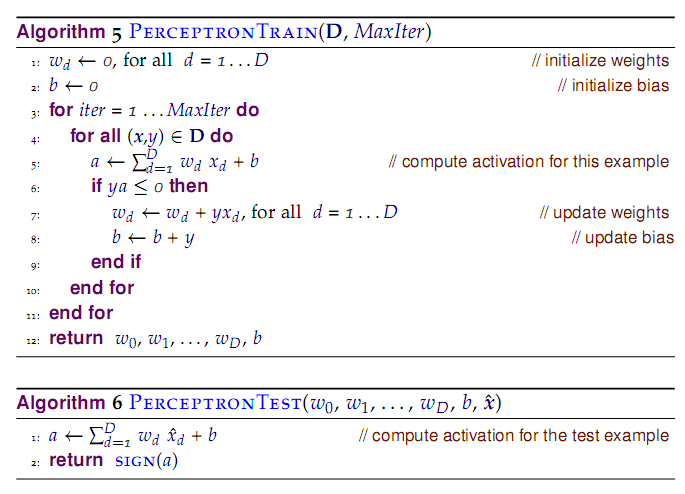

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

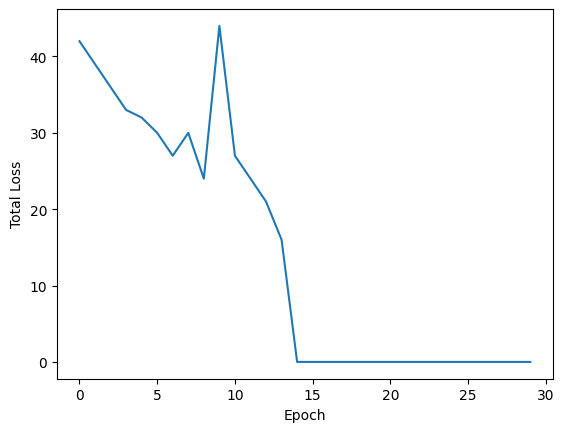

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

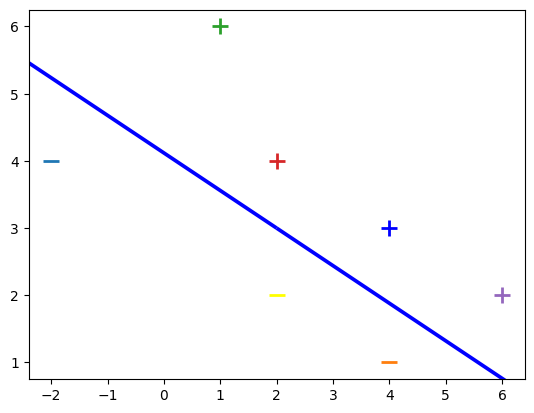

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


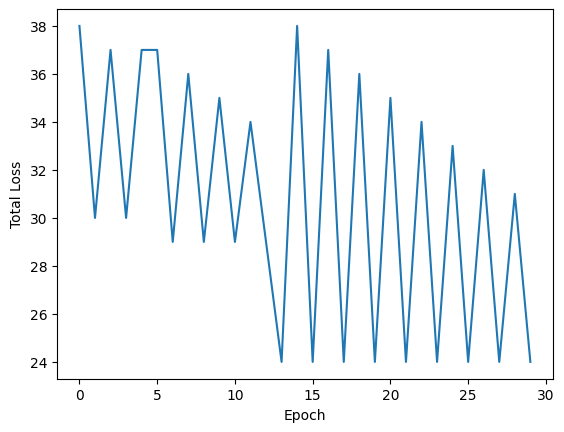

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

### **ANSWER - 1**
To apply gradient descent on a real dataset, let's use the Banknote Authentication dataset from the UCI Machine Learning Repository. We'll implement a simple linear regression model and perform gradient descent to minimize the mean squared error. Finally, we'll visualize the error plot.

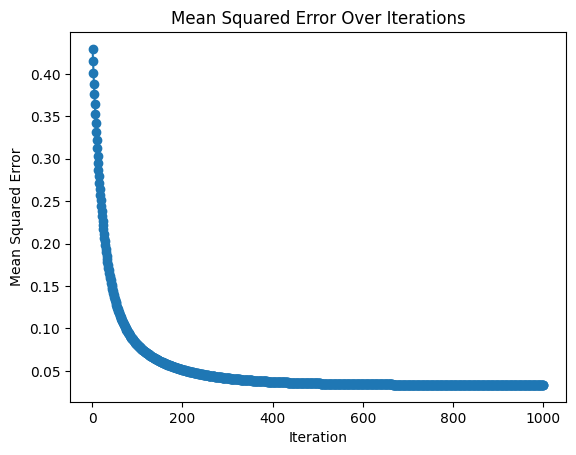

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Banknote Authentication dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ["variance", "skewness", "curtosis", "entropy", "class"]
data = pd.read_csv(url, names=column_names, header=None)

# Extract features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

# Convert y to numeric labels (0 or 1)
y = (y == 1).astype(int)

# Standardize features (optional but often beneficial for gradient descent)
X = (X - X.mean()) / X.std()

# Add a column of ones for the bias term
X["bias"] = 1

# Convert to numpy arrays
X = X.values
y = y.values

def mean_squared_error(X, y, weights):
    predictions = X.dot(weights)
    mse = np.mean((predictions - y) ** 2)
    return mse

def gradient_descent(X, y, weights, learning_rate, num_iterations):
    mse_history = []

    for _ in range(num_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = 2 * X.T.dot(errors) / len(y)
        weights = weights - learning_rate * gradient
        mse = mean_squared_error(X, y, weights)
        mse_history.append(mse)

    return weights, mse_history

# Initialize weights
initial_weights = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
final_weights, mse_history = gradient_descent(X, y, initial_weights, learning_rate, num_iterations)

# Visualize the error plot
plt.plot(range(1, num_iterations + 1), mse_history, marker='o')
plt.title('Mean Squared Error Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()


### **ANSWER - 2**
The learning rate is a crucial hyperparameter in gradient descent, and its value greatly influences the convergence and stability of the algorithm. Let's experiment with different learning rates and observe their effects on convergence.

We'll try three scenarios: a moderate learning rate, a small learning rate, and a large learning rate. We'll then observe how the mean squared error changes over iterations

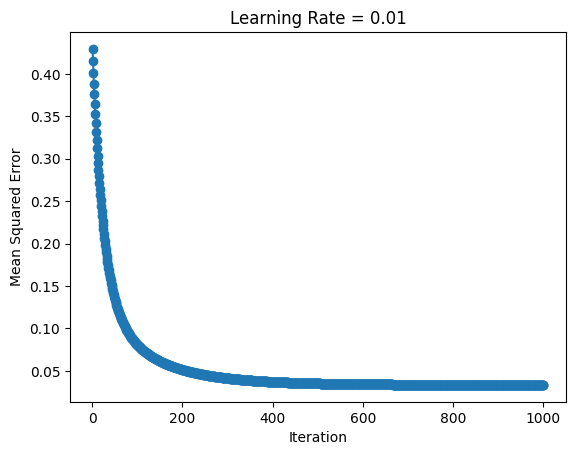

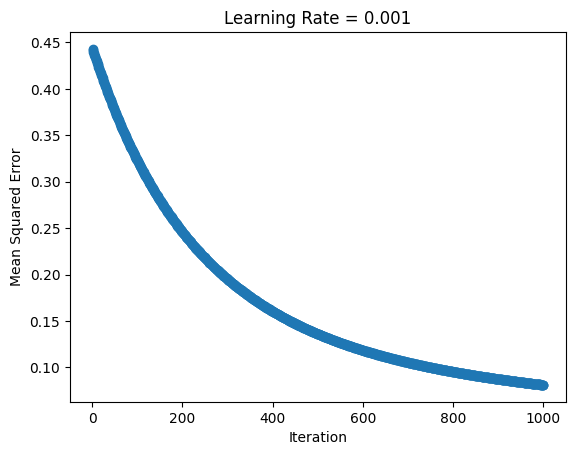

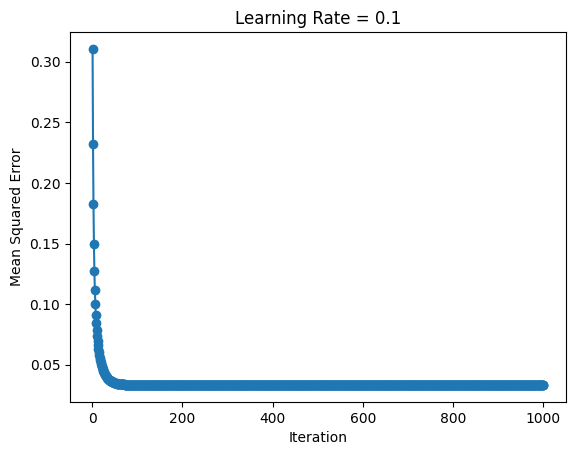

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Banknote Authentication dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ["variance", "skewness", "curtosis", "entropy", "class"]
data = pd.read_csv(url, names=column_names, header=None)

# Extract features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

# Convert y to numeric labels (0 or 1)
y = (y == 1).astype(int)

# Standardize features (optional but often beneficial for gradient descent)
X = (X - X.mean()) / X.std()

# Add a column of ones for the bias term
X["bias"] = 1

# Convert to numpy arrays
X = X.values
y = y.values

def mean_squared_error(X, y, weights):
    predictions = X.dot(weights)
    mse = np.mean((predictions - y) ** 2)
    return mse

def gradient_descent(X, y, weights, learning_rate, num_iterations):
    mse_history = []

    for _ in range(num_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = 2 * X.T.dot(errors) / len(y)
        weights = weights - learning_rate * gradient
        mse = mean_squared_error(X, y, weights)
        mse_history.append(mse)

    return weights, mse_history

def plot_convergence(mse_history, title):
    plt.plot(range(1, len(mse_history) + 1), mse_history, marker='o')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.show()

# Experiment with different learning rates
learning_rate_1 = 0.01
learning_rate_2 = 0.001
learning_rate_3 = 0.1

# Initialize weights
initial_weights = np.zeros(X.shape[1])

# Set number of iterations
num_iterations = 1000

# Run gradient descent for different learning rates
final_weights_1, mse_history_1 = gradient_descent(X, y, initial_weights, learning_rate_1, num_iterations)
plot_convergence(mse_history_1, f'Learning Rate = {learning_rate_1}')

final_weights_2, mse_history_2 = gradient_descent(X, y, initial_weights, learning_rate_2, num_iterations)
plot_convergence(mse_history_2, f'Learning Rate = {learning_rate_2}')

final_weights_3, mse_history_3 = gradient_descent(X, y, initial_weights, learning_rate_3, num_iterations)
plot_convergence(mse_history_3, f'Learning Rate = {learning_rate_3}')


## **ANSWER - 3**
If you use a toy dataset that is not linearly separable, the perceptron algorithm may not converge, or it may take a long time to find a solution. The perceptron algorithm is designed for linearly separable datasets, and it has limitations when applied to datasets that are not linearly separable.

Here's an example using a toy dataset with two features:

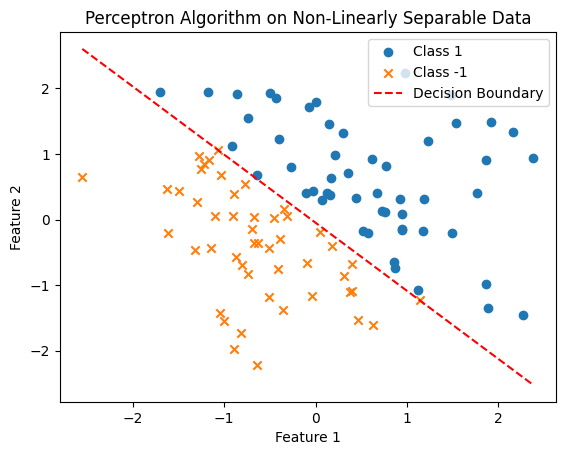

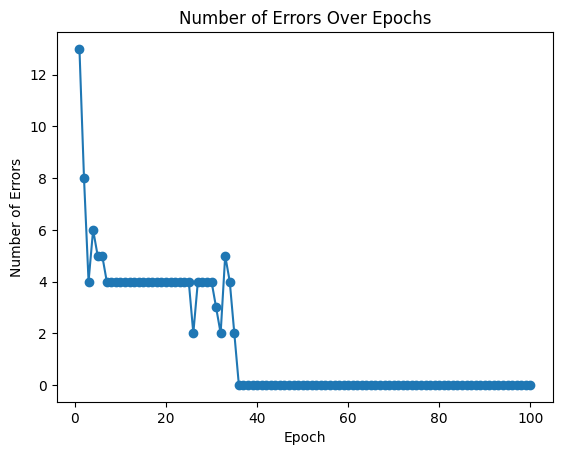

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create a toy dataset that is not linearly separable
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.ones(100)
y[X[:, 0] + X[:, 1] < 0] = -1

# Implement the perceptron algorithm
def perceptron(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1] + 1)  # Additional dimension for the bias term
    errors = []

    for epoch in range(epochs):
        error = 0
        for xi, target in zip(X, y):
            update = learning_rate * (target - np.sign(np.dot(xi, weights[1:]) + weights[0]))
            weights[1:] += update * xi
            weights[0] += update
            error += int(update != 0.0)

        errors.append(error)

    return weights, errors

# Run the perceptron algorithm
weights, errors = perceptron(X, y)

# Visualize the dataset and decision boundary
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='x', label='Class -1')

x_decision_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_decision_boundary = -(weights[1] * x_decision_boundary + weights[0]) / weights[2]

plt.plot(x_decision_boundary, y_decision_boundary, color='red', linestyle='--', label='Decision Boundary')

plt.title('Perceptron Algorithm on Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot the number of errors over epochs
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.title('Number of Errors Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.show()
